In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import os
import numpy as np
import matplotlib.pyplot as plt

In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [7]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [15]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_adam = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history_rmsprop = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=1)

Epoch 1/5
782/782 [==============================] - 319s 408ms/step - loss: 1.6332 - accuracy: 0.4541 - val_loss: 1.4825 - val_accuracy: 0.5081
Epoch 3/5
782/782 [==============================] - 320s 409ms/step - loss: 1.5803 - accuracy: 0.4739 - val_loss: 1.4229 - val_accuracy: 0.5309
Epoch 4/5
782/782 [==============================] - 316s 404ms/step - loss: 1.5322 - accuracy: 0.4923 - val_loss: 1.4207 - val_accuracy: 0.5375
Epoch 5/5
782/782 [==============================] - 324s 415ms/step - loss: 1.4829 - accuracy: 0.5093 - val_loss: 1.3714 - val_accuracy: 0.5531
Epoch 1/5
782/782 [==============================] - 316s 402ms/step - loss: 1.4050 - accuracy: 0.5279 - val_loss: 1.1802 - val_accuracy: 0.6059
Epoch 2/5
782/782 [==============================] - 314s 401ms/step - loss: 1.1872 - accuracy: 0.6124 - val_loss: 1.0004 - val_accuracy: 0.6745
Epoch 3/5
782/782 [==============================] - 319s 408ms/step - loss: 1.0729 - accuracy: 0.6520 - val_loss: 0.9391 - val_ac

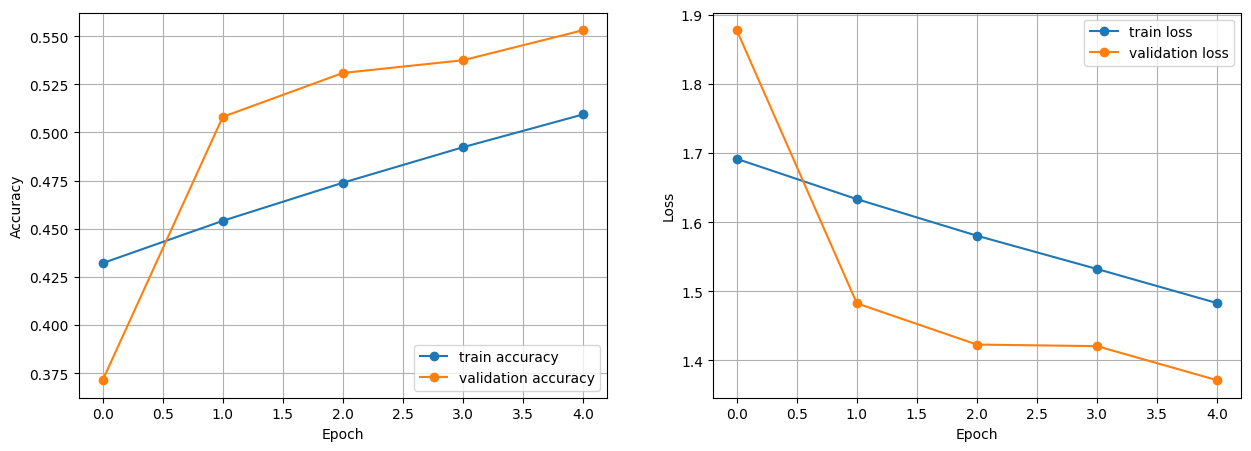

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_sgd.history['loss'], 'o-', label='train loss')
plt.plot(history_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

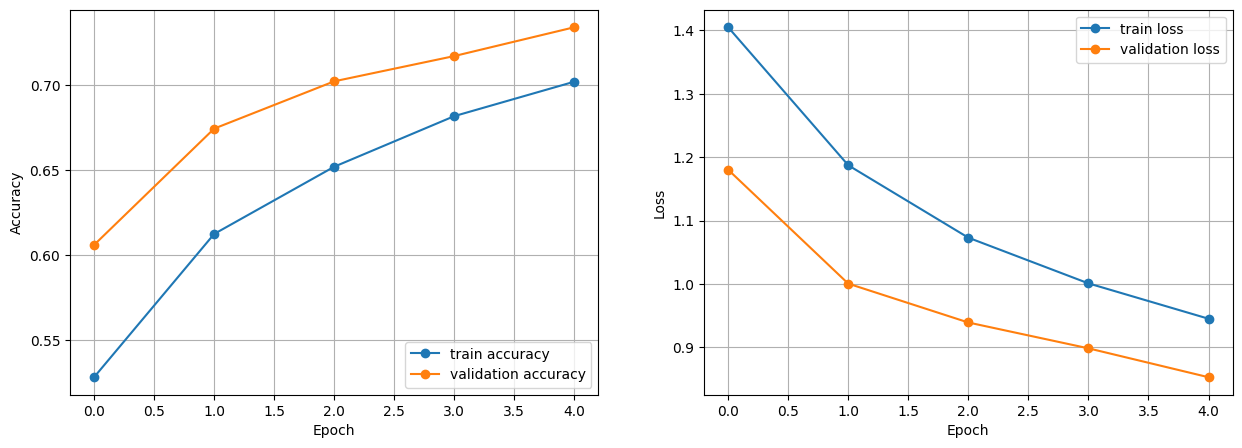

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_adam.history['loss'], 'o-', label='train loss')
plt.plot(history_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

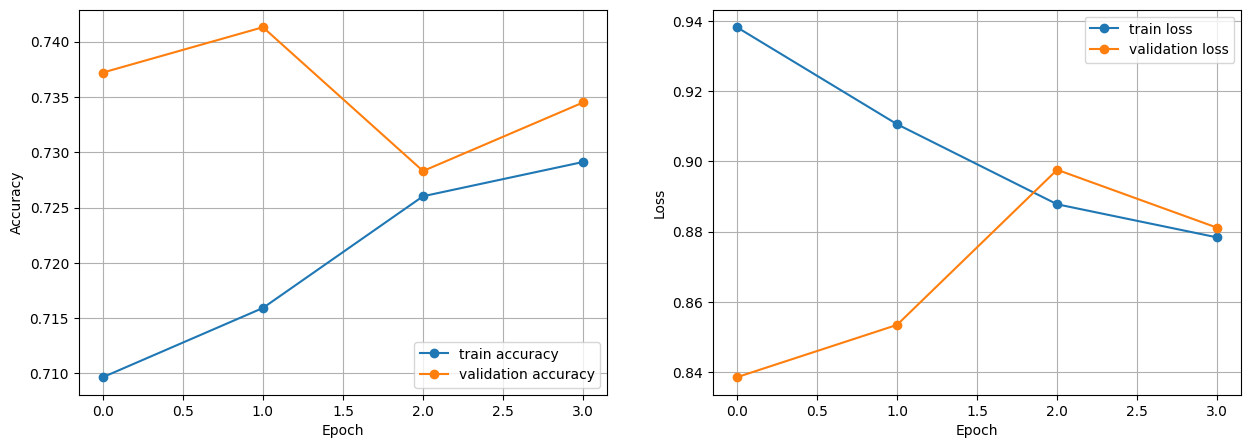

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_rmsprop.history['accuracy'], 'o-', label='train accuracy')
plt.plot(history_rmsprop.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_rmsprop.history['loss'], 'o-', label='train loss')
plt.plot(history_rmsprop.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()